In [60]:
import itertools
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [61]:
# Importing dataset is stored locally
df=pd.read_csv('mbti_1.csv', dtype={'type': str, 'posts': str})
df.info()
# Für spätere visualisierung
mbti = {'I':'Introversion', 'E':'Extroversion', 'N':'Intuition',
        'S':'Sensing', 'T':'Thinking', 'F': 'Feeling',
        'J':'Judging', 'P': 'Perceiving'}

#TODO: Raus, nur drin um erstmal Zeit zu sparen
#df = df.head(200)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


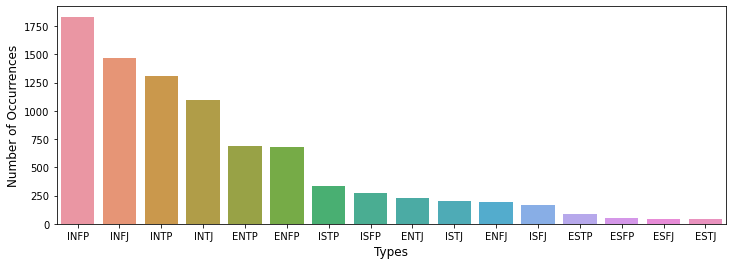

In [62]:
#Anzahl der verschiedenen Typen zählen
df_counted = df['type'].value_counts()
df_counted.head()

plt.figure(figsize=(12,4))
sns.barplot(x = df_counted.index, y = df_counted.values)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Types', fontsize=12)
plt.show()

# Vorverarbeitung
TODO: Nicht mehr ganz up to date
- ' Am anfang und Ende des Strings entfernen
- Nach ||| in eine Liste an Posts Splitten
- lowercase
- Links zählen und entfernen **IDEE:** Statt links zu entfernen diese mit einem eindeutigen Keyword ersetzen sowas wie <link>
- Abkürzungen auflösen
- Satzzeichen entfernen
- Mehrere vorkommen von einem Buchstaben in einem Wort zusammenfassen auf zwei vorkomnisse (loooove -> loove)
- Zahlen und Wörter mit Zahlen entfernen
- MBTI Kennzeichungen entfernen, da diese in diesem Datensatz sehr häufig vertreten
- Überflüssige Leerzeichen entfernt
- Leere Listenelemente entfernt, da einige Posts nur aus Links bestanten, welche gelöscht wurden

In [63]:
def dequote(s):
    """
    If a string has single or double quotes around it, remove them.
    Make sure the pair of quotes match.
    If a matching pair of quotes is not found, return the string unchanged.
    """
    if (s[0] == s[-1]) and s.startswith(("'", '"')):
        return s[1:-1]
    return s

#Anführungszeichen entfernen vorne und hinten
df['posts_processed_dequote'] = df['posts'].apply(dequote)

In [64]:
#Split an ||| 
df['posts_processed_dequote_split']=df['posts_processed_dequote'].apply(lambda x: x.split('|||'))
print('||| Split')
#df.head()

||| Split


In [65]:
df['posts_processed_dequote_split_lowercase']=df['posts_processed_dequote_split'].apply(lambda posts : list(map(str.lower, posts)))
print('lowercase')
print('Vergleich')
print(df.at[0, 'posts_processed_dequote_split'])
print(df.at[0, 'posts_processed_dequote_split_lowercase'])
#df.head()


lowercase
Vergleich
['http://www.youtube.com/watch?v=qsXHcwe3krw', 'http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg', 'enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks', 'What has been the most life-changing experience in your life?', 'http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.', 'May the PerC Experience immerse you.', 'The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206', "Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...", '84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/

In [66]:
#Links in den Kommentaren Zählen

def count_links_in_list (list):
    link_counter = 0
    for e in list:
        link_counter += e.count('http')
    return link_counter

df['links_in_posts'] = df['posts_processed_dequote_split_lowercase'].apply(count_links_in_list)
print('Count Links')
#df.head(5)

Count Links


In [67]:
#Durchschnitt Links pro 50 Posts
df['avg_link_per_post'] = df['links_in_posts'].divide(50.0)
#df.head(5)

<AxesSubplot:xlabel='type', ylabel='avg_link_per_post'>

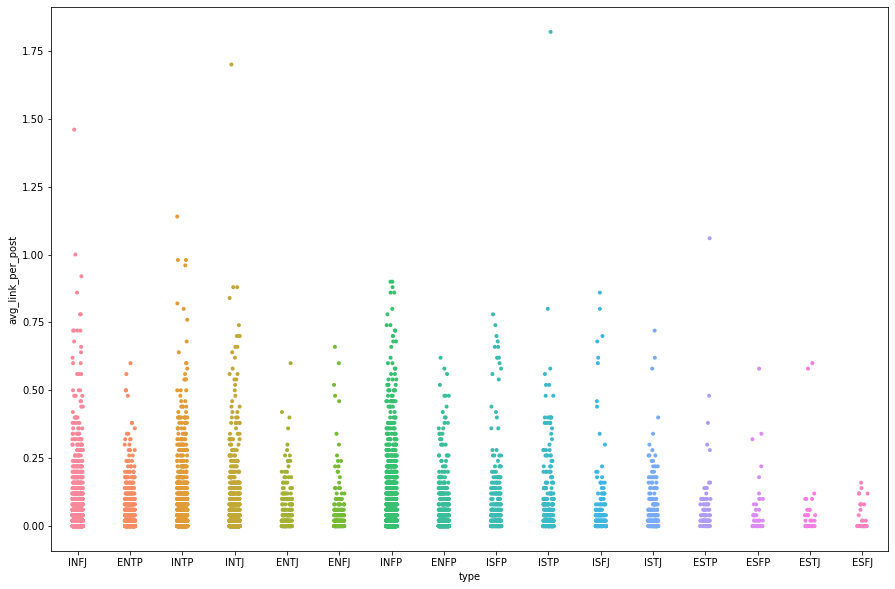

In [68]:
#Durchschnitt Links pro 50 Posts visualisieren
plt.figure(figsize=(15,10))
sns.stripplot(x='type', y = 'avg_link_per_post', s = 4,data = df)

In [69]:
def remove_URL(stringliteral):
    """Remove URLs from a sample string"""
    return re.sub(r'https?://\S+', '', str(stringliteral))

df['posts_processed_dequote_split_lowercase_linksRemoved']=df['posts_processed_dequote_split_lowercase'].apply(lambda posts : list(map(remove_URL, posts)))
print('Removed Links')
print('Before')
print(df.at[0, 'posts_processed_dequote_split_lowercase'])
print('After')
print(df.at[0, 'posts_processed_dequote_split_lowercase_linksRemoved'])
#df.head(5)

Removed Links
Before
['http://www.youtube.com/watch?v=qsxhcwe3krw', 'http://41.media.tumblr.com/tumblr_lfouy03pma1qa1rooo1_500.jpg', 'enfp and intj moments  https://www.youtube.com/watch?v=iz7le1g4xm4  sportscenter not top ten plays  https://www.youtube.com/watch?v=ucdfze1etec  pranks', 'what has been the most life-changing experience in your life?', 'http://www.youtube.com/watch?v=vxzeywwrdw8   http://www.youtube.com/watch?v=u8ejam5dp3e  on repeat for most of today.', 'may the perc experience immerse you.', 'the last thing my infj friend posted on his facebook before committing suicide the next day. rest in peace~   http://vimeo.com/22842206', "hello enfj7. sorry to hear of your distress. it's only natural for a relationship to not be perfection all the time in every moment of existence. try to figure the hard times as times of growth, as...", '84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010

**Achtung** : Ab hier nicht mehr immer 50 Posts pro Zeile, da einige Posts nur aus einem Link bestanden und diese nun entfernt wurden -> Leeres Element in der Liste an Posts.

In [70]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "i'd": "i would", "i'd've": "i would have","i'll": "i will",
                     "i'll've": "i will have","i'm": "i am","i've": "i have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not",
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}



# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions
#df['posts_processed_dequote_split_lowercase_linksRemoved_expandedContractions']=df['posts_processed_dequote_split_lowercase_linksRemoved'].apply(lambda x : expand_contractions(x))
df['posts_processed_dequote_split_lowercase_linksRemoved_expandedContractions']=df['posts_processed_dequote_split_lowercase_linksRemoved'].apply(lambda posts : list(map(lambda post : expand_contractions(post), posts)))
print('Abkürzungen entfernen')
print('Before')
print(df.at[1, 'posts_processed_dequote_split_lowercase_linksRemoved'])
print('After')
print(df.at[1, 'posts_processed_dequote_split_lowercase_linksRemoved_expandedContractions'])
#df.head(5)

Abkürzungen entfernen
Before
["i'm finding the lack of me in these posts very alarming.", "sex can be boring if it's in the same position often. for example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. there isn't enough...", "giving new meaning to 'game' theory.", "hello *entp grin*  that's all it takes. than we converse and they do most of the flirting while i acknowledge their presence and return their words with smooth wordplay and more cheeky grins.", 'this + lack of balance and hand eye coordination.', "real iq test i score 127. internet iq tests are funny. i score 140s or higher.  now, like the former responses of this thread i will mention that i don't believe in the iq test. before you banish...", "you know you're an entp when you vanish from a site for a year and a half, return, and find people are still commenting on your posts and liking your ideas/thoughts. you know you're an entp when you...", '', '', 'i over

In [71]:
# Ausrufezeichen und Fragezeichen zählen, bevor sie entfernt werden

def count_punctuation_in_list (list, punct):
    counter = 0
    for e in list:
        counter += e.count(punct)
    return counter

df['exclamations_in_posts'] = df['posts_processed_dequote_split_lowercase_linksRemoved_expandedContractions'].apply(lambda list : count_punctuation_in_list(list, '!'))
df['questions_in_posts'] = df['posts_processed_dequote_split_lowercase_linksRemoved_expandedContractions'].apply(lambda list : count_punctuation_in_list(list, '?'))
print('Count Exclamation and Question Marks')
#df.head(5)

Count Exclamation and Question Marks


Text(0, 0.5, 'Question Marks')

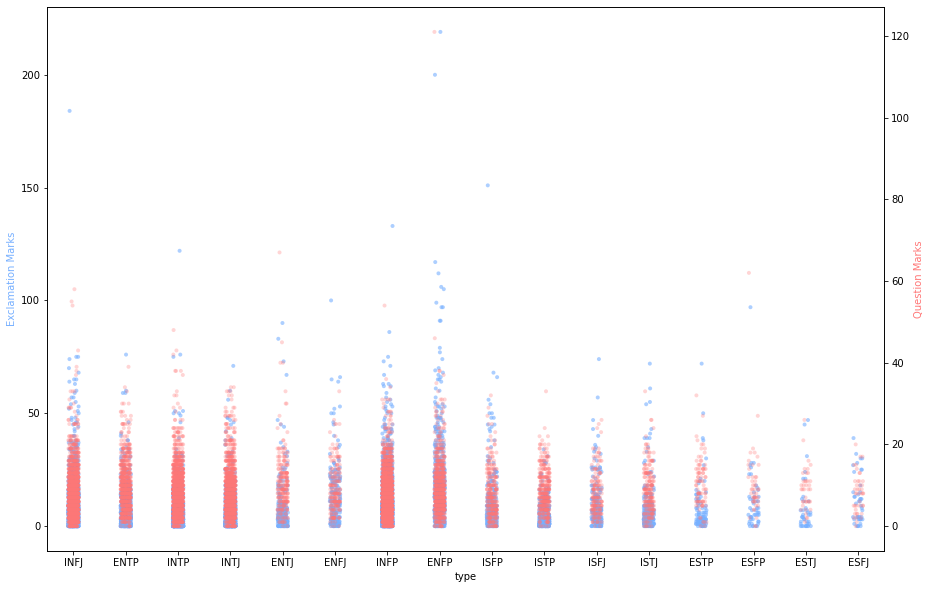

In [72]:
# Benutzung von Exclamation und Question Marks visualisieren
fig, ax1 = plt.subplots(figsize=(15,10))
sns.stripplot(x='type', y = 'exclamations_in_posts', s = 4, color="#77b0ff", alpha=0.6, data = df, ax=ax1)
ax1.set_ylabel('Exclamation Marks', color="#77b0ff")
ax2 = ax1.twinx()
sns.stripplot(x='type', y = 'questions_in_posts', s = 4, color="#ff7777", alpha=0.3, data = df, ax=ax2)
ax2.set_ylabel('Question Marks', color="#ff7777")

In [73]:
#Satzzeichen mit Leerzeichen ersetzen (muss nach den contractions passieren, da diese ebenfalls entfernt werden )
df['posts_processed_dequote_split_lowercase_linksRemoved_expandedContractions_punctuationRemoved']=df['posts_processed_dequote_split_lowercase_linksRemoved_expandedContractions'].apply(lambda posts : list(map(lambda post: re.sub('[%s]' % re.escape(string.punctuation), ' ', post), posts)))
print('Satzzeichen entfernt')
print('Before')
print(df.at[1, 'posts_processed_dequote_split_lowercase_linksRemoved_expandedContractions'])
print('After')
print(df.at[1, 'posts_processed_dequote_split_lowercase_linksRemoved_expandedContractions_punctuationRemoved'])
#df.head(5)

Satzzeichen entfernt
Before
['i am finding the lack of me in these posts very alarming.', 'sex can be boring if it is in the same position often. for example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. there is not enough...', "giving new meaning to 'game' theory.", 'hello *entp grin*  that is all it takes. than we converse and they do most of the flirting while i acknowledge their presence and return their words with smooth wordplay and more cheeky grins.', 'this + lack of balance and hand eye coordination.', 'real iq test i score 127. internet iq tests are funny. i score 140s or higher.  now, like the former responses of this thread i will mention that i do not believe in the iq test. before you banish...', 'you know you are an entp when you vanish from a site for a year and a half, return, and find people are still commenting on your posts and liking your ideas/thoughts. you know you are an entp when you...', '', '', '

In [74]:
df['posts_processed_dequote_split_lowercase_linksRemoved_expandedContractions_punctuationRemoved_multipleLettersSquashed']=df['posts_processed_dequote_split_lowercase_linksRemoved_expandedContractions_punctuationRemoved'].apply(lambda posts : list(map(lambda post : ''.join(''.join(s)[:2] for _, s in itertools.groupby(post)), posts)))
print('Mehr als 2 Buchstaben hinereinander zusammengefasst')
#df.head()

Mehr als 2 Buchstaben hinereinander zusammengefasst


In [75]:
#Zahlen und Wörter mit Zahlen entfernen
df['posts_processed_dequote_split_lowercase_linksRemoved_expandedContractions_punctuationRemoved_multipleLettersSquashed_removedNumbers']=df['posts_processed_dequote_split_lowercase_linksRemoved_expandedContractions_punctuationRemoved_multipleLettersSquashed'].apply(lambda posts : list(map(lambda post: re.sub('\w*\d\w*','', post), posts)))
print('Zahlen und Wörter mit Zahlen entfernt')
print('Before')
print(df.at[1, 'posts_processed_dequote_split_lowercase_linksRemoved_expandedContractions_punctuationRemoved_multipleLettersSquashed'])
print('After')
print(df.at[1, 'posts_processed_dequote_split_lowercase_linksRemoved_expandedContractions_punctuationRemoved_multipleLettersSquashed_removedNumbers'])
#df.head(5)

Zahlen und Wörter mit Zahlen entfernt
Before
['i am finding the lack of me in these posts very alarming ', 'sex can be boring if it is in the same position often  for example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary  there is not enough  ', 'giving new meaning to  game  theory ', 'hello  entp grin  that is all it takes  than we converse and they do most of the flirting while i acknowledge their presence and return their words with smooth wordplay and more cheeky grins ', 'this  lack of balance and hand eye coordination ', 'real iq test i score 127  internet iq tests are funny  i score 140s or higher  now  like the former responses of this thread i will mention that i do not believe in the iq test  before you banish  ', 'you know you are an entp when you vanish from a site for a year and a half  return  and find people are still commenting on your posts and liking your ideas thoughts  you know you are an entp when you  '

In [76]:
#MBTI Strings entfernen
mbti_strings = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']
mbti_strings = [e.lower() for e in mbti_strings]

def remove_mbti_strings (post):
    for e in mbti_strings:
        post = post.replace(e,'')
    return post

df['posts_processed_dequote_split_lowercase_linksRemoved_expandedContractions_punctuationRemoved_multipleLettersSquashed_removedNumbers_removedMbtiStrings']=df['posts_processed_dequote_split_lowercase_linksRemoved_expandedContractions_punctuationRemoved_multipleLettersSquashed_removedNumbers'].apply(lambda posts : list(map(remove_mbti_strings, posts)))
print('MBTI Strings entfernt')
print('Before')
print(df.at[3, 'posts_processed_dequote_split_lowercase_linksRemoved_expandedContractions_punctuationRemoved_multipleLettersSquashed_removedNumbers'])
print('After')
print(df.at[3, 'posts_processed_dequote_split_lowercase_linksRemoved_expandedContractions_punctuationRemoved_multipleLettersSquashed_removedNumbers_removedMbtiStrings'])
#df.head(5)

MBTI Strings entfernt
Before
['dear intp  i enjoyed our conversation the other day  esoteric gabbing about the nature of the universe and the idea that every rule and social code being arbitrary constructs created  ', 'dear entj sub  long time no see  sincerely  alpha', 'none of them  all other types hurt in deep existential ways that i want no part of ', 'probably a sliding scale that depends on individual preferences  like everything in humanity ', 'draco malfoy also  i would say he is either  or  ', 'i am either  or   though in which stacking to me is a somewhat arbitrary distinction to make as i believe that the core indicates primary motivation and has a hand in every action  therefore  a  ', 'i am not particularly introverted or extraverted  personally  that said  i would say i am somewhat unphased by either social interactions or being alone  what i would say i crave more so than anything is  ', 'dear type  infp  your absolute admiration of me is refreshing  you are a great girl

In [77]:
# Mehrere Leerzeichen hintereinander mit einem Leerzeichen ersetzen.
df['posts_processed_dequote_split_lowercase_linksRemoved_expandedContractions_punctuationRemoved_multipleLettersSquashed_removedNumbers_removedMbtiStrings_removedSpaces']=df['posts_processed_dequote_split_lowercase_linksRemoved_expandedContractions_punctuationRemoved_multipleLettersSquashed_removedNumbers_removedMbtiStrings'].apply(lambda posts : list(map(lambda post: re.sub(' +',' ',post), posts)))
print('Leerzeichen zusammengefasst')
print('Before')
print(df.at[1, 'posts_processed_dequote_split_lowercase_linksRemoved_expandedContractions_punctuationRemoved_multipleLettersSquashed_removedNumbers_removedMbtiStrings'])
print('After')
print(df.at[1, 'posts_processed_dequote_split_lowercase_linksRemoved_expandedContractions_punctuationRemoved_multipleLettersSquashed_removedNumbers_removedMbtiStrings_removedSpaces'])
#df.head(5)

Leerzeichen zusammengefasst
Before
['i am finding the lack of me in these posts very alarming ', 'sex can be boring if it is in the same position often  for example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary  there is not enough  ', 'giving new meaning to  game  theory ', 'hello   grin  that is all it takes  than we converse and they do most of the flirting while i acknowledge their presence and return their words with smooth wordplay and more cheeky grins ', 'this  lack of balance and hand eye coordination ', 'real iq test i score   internet iq tests are funny  i score  or higher  now  like the former responses of this thread i will mention that i do not believe in the iq test  before you banish  ', 'you know you are an  when you vanish from a site for a year and a half  return  and find people are still commenting on your posts and liking your ideas thoughts  you know you are an  when you  ', '', '', 'i over think thing

In [78]:
#Leere Listenelemente Löschen
df['posts_processed_dequote_split_lowercase_linksRemoved_expandedContractions_punctuationRemoved_multipleLettersSquashed_removedNumbers_removedMbtiStrings_removedSpaces_removedEmptyPosts']=df['posts_processed_dequote_split_lowercase_linksRemoved_expandedContractions_punctuationRemoved_multipleLettersSquashed_removedNumbers_removedMbtiStrings_removedSpaces'].apply(lambda posts : list(filter(None, posts)))
print('Leere Listenelemente gelöscht')
print('Before')
print(df.at[0, 'posts_processed_dequote_split_lowercase_linksRemoved_expandedContractions_punctuationRemoved_multipleLettersSquashed_removedNumbers_removedMbtiStrings_removedSpaces'])
print('After')
print(df.at[0, 'posts_processed_dequote_split_lowercase_linksRemoved_expandedContractions_punctuationRemoved_multipleLettersSquashed_removedNumbers_removedMbtiStrings_removedSpaces_removedEmptyPosts'])
#df.head(5)

Leere Listenelemente gelöscht
Before
['', '', ' and moments sportscenter not top ten plays pranks', 'what has been the most life changing experience in your life ', ' on repeat for most of today ', 'may the perc experience immerse you ', 'the last thing my friend posted on his facebook before committing suicide the next day rest in peace ', 'hello sorry to hear of your distress it is only natural for a relationship to not be perfection all the time in every moment of existence try to figure the hard times as times of growth as ', ' ', 'welcome and stuff ', ' game set match ', 'prozac wellbrutin at least thirty minutes of moving your legs and i do not mean moving them while sitting in your same desk chair weed in moderation maybe try edibles as a healthier alternative ', 'basically come up with three items you have determined that each type or whichever types you want to do would more than likely use given each types cognitive functions and whatnot when left by ', 'all things in moderat

## Feature Extraktion
**Achtung** : Ab hier hat die Liste an Posts eine unterschiedliche Anzahl an Elementen

In [79]:
#Neuen Dataframe erstellen, mit dem Weitergearbeitet werden kann
selected_columns = df[['type','exclamations_in_posts','questions_in_posts', 'posts_processed_dequote_split_lowercase_linksRemoved_expandedContractions_punctuationRemoved_multipleLettersSquashed_removedNumbers_removedMbtiStrings_removedSpaces_removedEmptyPosts','links_in_posts','avg_link_per_post']]
df_processed = selected_columns.copy()
#Umbenennen
df_processed = df_processed.rename(columns={'posts_processed_dequote_split_lowercase_linksRemoved_expandedContractions_punctuationRemoved_multipleLettersSquashed_removedNumbers_removedMbtiStrings_removedSpaces_removedEmptyPosts': 'posts'})
df_processed['post_amount'] = df_processed['posts'].apply(lambda posts : len(posts))
df_processed.head()

,type,exclamations_in_posts,questions_in_posts,posts,links_in_posts,avg_link_per_post,post_amount
0,INFJ,3,2,[ and moments sportscenter not top ten plays p...,24,0.48,36
1,ENTP,0,4,[i am finding the lack of me in these posts ve...,10,0.20,47
2,INTP,4,9,"[good one , of course to which i say i know th...",5,0.10,42
3,INTJ,3,9,[dear i enjoyed our conversation the other day...,2,0.04,50
4,ENTJ,1,8,"[you are fired , that is another silly misconc...",6,0.12,46


In [80]:
#Wörter per Post

df_processed['words_per_post'] = df_processed['posts'].apply(lambda posts : list(map(lambda post: len(post.split()), posts)))
df_processed.head(5)

,type,exclamations_in_posts,questions_in_posts,posts,links_in_posts,avg_link_per_post,post_amount,words_per_post
0,INFJ,3,2,[ and moments sportscenter not top ten plays p...,24,0.48,36,"[8, 11, 6, 6, 18, 37, 0, 3, 3, 34, 34, 38, 19,..."
1,ENTP,0,4,[i am finding the lack of me in these posts ve...,10,0.20,47,"[12, 36, 6, 33, 8, 37, 39, 34, 7, 1, 44, 40, 3..."
2,INTP,4,9,"[good one , of course to which i say i know th...",5,0.10,42,"[2, 15, 38, 9, 38, 36, 8, 10, 11, 24, 23, 10, ..."
3,INTJ,3,9,[dear i enjoyed our conversation the other day...,2,0.04,50,"[29, 8, 17, 13, 10, 35, 35, 35, 18, 8, 38, 1, ..."
4,ENTJ,1,8,"[you are fired , that is another silly misconc...",6,0.12,46,"[3, 33, 33, 7, 36, 11, 8, 37, 12, 15, 3, 40, 4..."


In [81]:
# Durchschnitt der Wörter pro Post
df_processed['avg_words_of_posts'] = df_processed['words_per_post'].apply(lambda word_list : np.mean(word_list))
print('Durchschnittl. words per Post')
df_processed.head(5)

Durchschnittl. words per Post


,type,exclamations_in_posts,questions_in_posts,posts,links_in_posts,avg_link_per_post,post_amount,words_per_post,avg_words_of_posts
0,INFJ,3,2,[ and moments sportscenter not top ten plays p...,24,0.48,36,"[8, 11, 6, 6, 18, 37, 0, 3, 3, 34, 34, 38, 19,...",16.166667
1,ENTP,0,4,[i am finding the lack of me in these posts ve...,10,0.20,47,"[12, 36, 6, 33, 8, 37, 39, 34, 7, 1, 44, 40, 3...",26.212766
2,INTP,4,9,"[good one , of course to which i say i know th...",5,0.10,42,"[2, 15, 38, 9, 38, 36, 8, 10, 11, 24, 23, 10, ...",20.928571
3,INTJ,3,9,[dear i enjoyed our conversation the other day...,2,0.04,50,"[29, 8, 17, 13, 10, 35, 35, 35, 18, 8, 38, 1, ...",22.660000
4,ENTJ,1,8,"[you are fired , that is another silly misconc...",6,0.12,46,"[3, 33, 33, 7, 36, 11, 8, 37, 12, 15, 3, 40, 4...",22.500000


<AxesSubplot:xlabel='type', ylabel='avg_words_of_posts'>

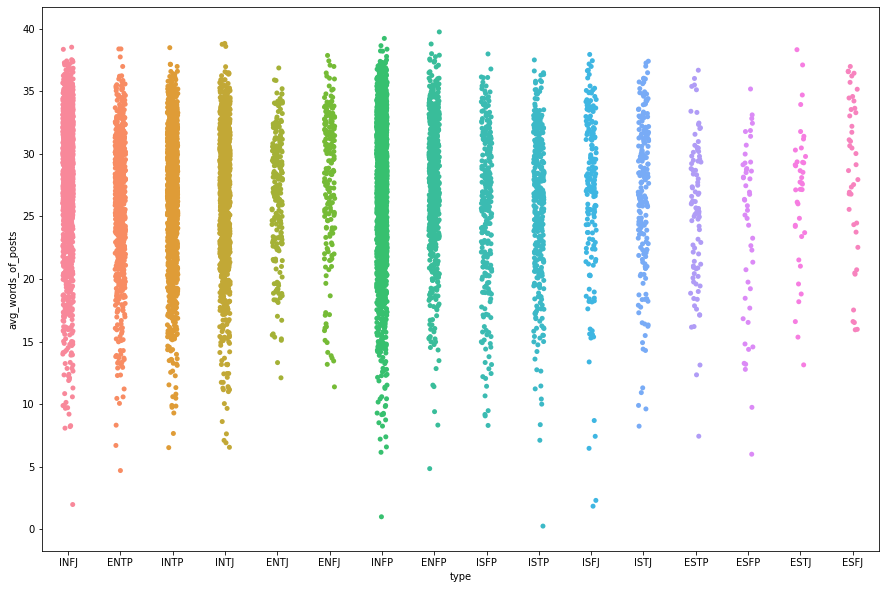

In [82]:
plt.figure(figsize=(15,10))
sns.stripplot(x = "type", y = "avg_words_of_posts", data=df_processed)

In [83]:
#Buchstaben pro Posts
df_processed['characters_per_post'] = df_processed['posts'].apply(lambda posts : list(map(lambda post: len(post) - post.count(' '), posts)))
print('Buchstaben pro Post berechnen')
print(df_processed.at[0,'posts'])
df_processed.head(5)

Buchstaben pro Post berechnen
[' and moments sportscenter not top ten plays pranks', 'what has been the most life changing experience in your life ', ' on repeat for most of today ', 'may the perc experience immerse you ', 'the last thing my friend posted on his facebook before committing suicide the next day rest in peace ', 'hello sorry to hear of your distress it is only natural for a relationship to not be perfection all the time in every moment of existence try to figure the hard times as times of growth as ', ' ', 'welcome and stuff ', ' game set match ', 'prozac wellbrutin at least thirty minutes of moving your legs and i do not mean moving them while sitting in your same desk chair weed in moderation maybe try edibles as a healthier alternative ', 'basically come up with three items you have determined that each type or whichever types you want to do would more than likely use given each types cognitive functions and whatnot when left by ', 'all things in moderation sims is ind

,type,exclamations_in_posts,questions_in_posts,posts,links_in_posts,avg_link_per_post,post_amount,words_per_post,avg_words_of_posts,characters_per_post
0,INFJ,3,2,[ and moments sportscenter not top ten plays p...,24,0.48,36,"[8, 11, 6, 6, 18, 37, 0, 3, 3, 34, 34, 38, 19,...",16.166667,"[42, 50, 22, 30, 83, 152, 0, 15, 12, 160, 159,..."
1,ENTP,0,4,[i am finding the lack of me in these posts ve...,10,0.20,47,"[12, 36, 6, 33, 8, 37, 39, 34, 7, 1, 44, 40, 3...",26.212766,"[45, 158, 28, 150, 39, 145, 149, 149, 27, 4, 1..."
2,INTP,4,9,"[good one , of course to which i say i know th...",5,0.10,42,"[2, 15, 38, 9, 38, 36, 8, 10, 11, 24, 23, 10, ...",20.928571,"[7, 50, 152, 25, 156, 155, 27, 46, 64, 100, 11..."
3,INTJ,3,9,[dear i enjoyed our conversation the other day...,2,0.04,50,"[29, 8, 17, 13, 10, 35, 35, 35, 18, 8, 38, 1, ...",22.660000,"[147, 34, 65, 79, 36, 154, 165, 149, 92, 27, 1..."
4,ENTJ,1,8,"[you are fired , that is another silly misconc...",6,0.12,46,"[3, 33, 33, 7, 36, 11, 8, 37, 12, 15, 3, 40, 4...",22.500000,"[11, 152, 132, 34, 148, 47, 44, 161, 54, 74, 9..."


In [84]:
# Durchschnitt der Buchstaben pro Posts
df_processed['avg_characters_of_posts'] = df_processed['characters_per_post'].apply(lambda word_list : np.mean(word_list))
print('Durchschnittl. Buchstaben per Post')
df_processed.head(5)

Durchschnittl. Buchstaben per Post


,type,exclamations_in_posts,questions_in_posts,posts,links_in_posts,avg_link_per_post,post_amount,words_per_post,avg_words_of_posts,characters_per_post,avg_characters_of_posts
0,INFJ,3,2,[ and moments sportscenter not top ten plays p...,24,0.48,36,"[8, 11, 6, 6, 18, 37, 0, 3, 3, 34, 34, 38, 19,...",16.166667,"[42, 50, 22, 30, 83, 152, 0, 15, 12, 160, 159,...",70.027778
1,ENTP,0,4,[i am finding the lack of me in these posts ve...,10,0.20,47,"[12, 36, 6, 33, 8, 37, 39, 34, 7, 1, 44, 40, 3...",26.212766,"[45, 158, 28, 150, 39, 145, 149, 149, 27, 4, 1...",101.382979
2,INTP,4,9,"[good one , of course to which i say i know th...",5,0.10,42,"[2, 15, 38, 9, 38, 36, 8, 10, 11, 24, 23, 10, ...",20.928571,"[7, 50, 152, 25, 156, 155, 27, 46, 64, 100, 11...",88.761905
3,INTJ,3,9,[dear i enjoyed our conversation the other day...,2,0.04,50,"[29, 8, 17, 13, 10, 35, 35, 35, 18, 8, 38, 1, ...",22.660000,"[147, 34, 65, 79, 36, 154, 165, 149, 92, 27, 1...",92.620000
4,ENTJ,1,8,"[you are fired , that is another silly misconc...",6,0.12,46,"[3, 33, 33, 7, 36, 11, 8, 37, 12, 15, 3, 40, 4...",22.500000,"[11, 152, 132, 34, 148, 47, 44, 161, 54, 74, 9...",94.717391


<AxesSubplot:xlabel='type', ylabel='avg_characters_of_posts'>

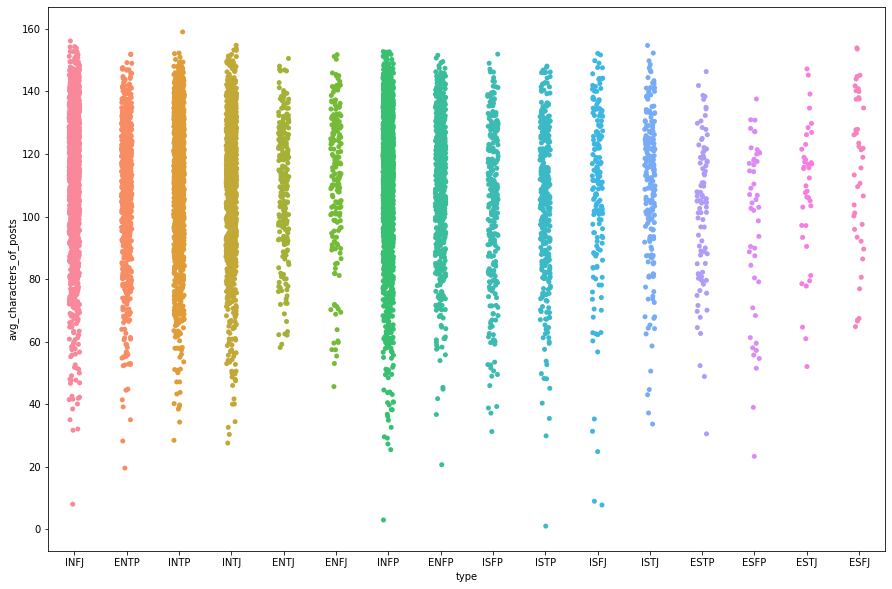

In [85]:
plt.figure(figsize=(15,10))
sns.stripplot(x = "type", y = "avg_characters_of_posts", data=df_processed)

Wortwolken

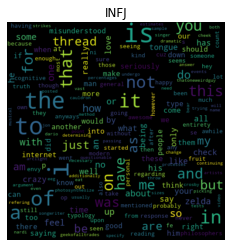

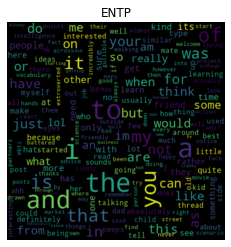

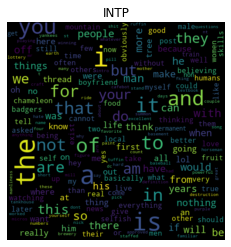

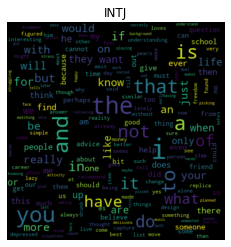

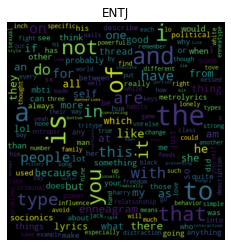

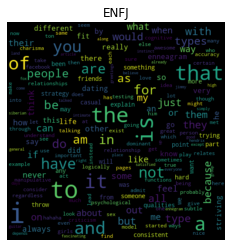

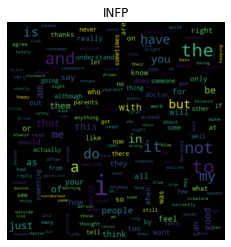

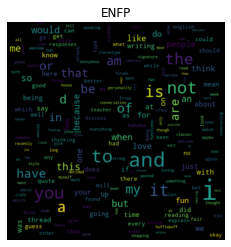

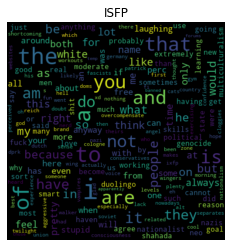

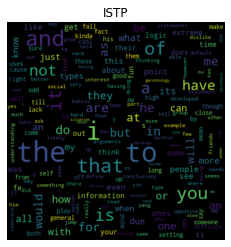

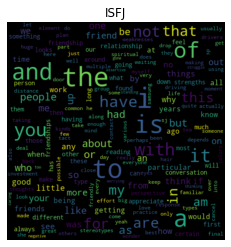

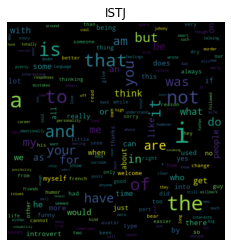

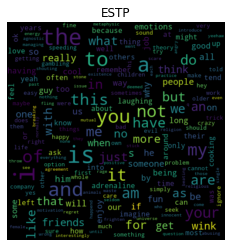

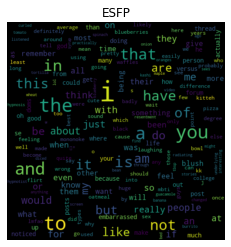

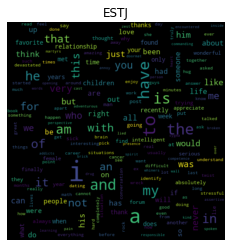

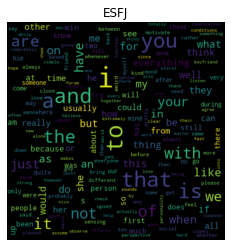

In [89]:
# Wortwolken
from functools import reduce
import wordcloud as wc

def splitAndCombine(l):
  return reduce(lambda x,y:x+y,[x.split() for x in l])

def countFrequency(l):
  freq = {}
  for word in l:
    if (word in freq):
      freq[word] += 1
    else:
      freq[word] = 1
  
  return freq

typeWithPostsDict = {k:v for k,v in zip(df_processed['type'], df_processed['posts'])}

typeWithWordsDict = {t:splitAndCombine(pL) for t,pL in typeWithPostsDict.items()}

typeWithWordFrequencyDict = {t:countFrequency(wL) for t,wL in typeWithWordsDict.items()}

typeWithWordClouds = {t:wc.WordCloud(width=500, height=500, max_font_size=64).fit_words(wF) for t,wF in typeWithWordFrequencyDict.items()}

for t,wC in typeWithWordClouds.items():
  plt.figure()
  plt.title(t)
  plt.imshow(wC, interpolation='bilinear')
  plt.axis("off")
  plt.show

Binäre repräsentation der MBTI-Typen erstellen

In [90]:
#Aufteilung in mehrere binäre Entscheidungen als bool wert.
map1 = {"I": 0, "E": 1}
map2 = {"N": 0, "S": 1}
map3 = {"T": 0, "F": 1}
map4 = {"J": 0, "P": 1}
df_processed['I-E'] = df_processed['type'].astype(str).str[0]
df_processed['I-E'] = df_processed['I-E'].map(map1)
df_processed['N-S'] = df_processed['type'].astype(str).str[1]
df_processed['N-S'] = df_processed['N-S'].map(map2)
df_processed['T-F'] = df_processed['type'].astype(str).str[2]
df_processed['T-F'] = df_processed['T-F'].map(map3)
df_processed['J-P'] = df_processed['type'].astype(str).str[3]
df_processed['J-P'] = df_processed['J-P'].map(map4)
df_processed.head(5)

,type,exclamations_in_posts,questions_in_posts,posts,links_in_posts,avg_link_per_post,post_amount,words_per_post,avg_words_of_posts,characters_per_post,avg_characters_of_posts,I-E,N-S,T-F,J-P
0,INFJ,3,2,[ and moments sportscenter not top ten plays p...,24,0.48,36,"[8, 11, 6, 6, 18, 37, 0, 3, 3, 34, 34, 38, 19,...",16.166667,"[42, 50, 22, 30, 83, 152, 0, 15, 12, 160, 159,...",70.027778,0,0,1,0
1,ENTP,0,4,[i am finding the lack of me in these posts ve...,10,0.20,47,"[12, 36, 6, 33, 8, 37, 39, 34, 7, 1, 44, 40, 3...",26.212766,"[45, 158, 28, 150, 39, 145, 149, 149, 27, 4, 1...",101.382979,1,0,0,1
2,INTP,4,9,"[good one , of course to which i say i know th...",5,0.10,42,"[2, 15, 38, 9, 38, 36, 8, 10, 11, 24, 23, 10, ...",20.928571,"[7, 50, 152, 25, 156, 155, 27, 46, 64, 100, 11...",88.761905,0,0,0,1
3,INTJ,3,9,[dear i enjoyed our conversation the other day...,2,0.04,50,"[29, 8, 17, 13, 10, 35, 35, 35, 18, 8, 38, 1, ...",22.660000,"[147, 34, 65, 79, 36, 154, 165, 149, 92, 27, 1...",92.620000,0,0,0,0
4,ENTJ,1,8,"[you are fired , that is another silly misconc...",6,0.12,46,"[3, 33, 33, 7, 36, 11, 8, 37, 12, 15, 3, 40, 4...",22.500000,"[11, 152, 132, 34, 148, 47, 44, 161, 54, 74, 9...",94.717391,1,0,0,0


Da in den Wortwolen so viele stop words sind wollte ich diese auch mal entfernen


Liste von einzelnen Posts zu einer einzigen Liste mit allen Wörtern aus den Posts zusammenfügen

In [91]:
# Function to convert
def listToString(s):

    # initialize an empty string
    str1 = " "

    # return string
    return (str1.join(s))

df_processed['posts_as_one_list'] = df_processed['posts'].apply(lambda posts : listToString(posts))
print('Posts zu einer Liste an Strings zusammenfügen')
df_processed.head(5)

Posts zu einer Liste an Strings zusammenfügen


,type,exclamations_in_posts,questions_in_posts,posts,links_in_posts,avg_link_per_post,post_amount,words_per_post,avg_words_of_posts,characters_per_post,avg_characters_of_posts,I-E,N-S,T-F,J-P,posts_as_one_list
0,INFJ,3,2,[ and moments sportscenter not top ten plays p...,24,0.48,36,"[8, 11, 6, 6, 18, 37, 0, 3, 3, 34, 34, 38, 19,...",16.166667,"[42, 50, 22, 30, 83, 152, 0, 15, 12, 160, 159,...",70.027778,0,0,1,0,and moments sportscenter not top ten plays pr...
1,ENTP,0,4,[i am finding the lack of me in these posts ve...,10,0.20,47,"[12, 36, 6, 33, 8, 37, 39, 34, 7, 1, 44, 40, 3...",26.212766,"[45, 158, 28, 150, 39, 145, 149, 149, 27, 4, 1...",101.382979,1,0,0,1,i am finding the lack of me in these posts ver...
2,INTP,4,9,"[good one , of course to which i say i know th...",5,0.10,42,"[2, 15, 38, 9, 38, 36, 8, 10, 11, 24, 23, 10, ...",20.928571,"[7, 50, 152, 25, 156, 155, 27, 46, 64, 100, 11...",88.761905,0,0,0,1,good one of course to which i say i know that...
3,INTJ,3,9,[dear i enjoyed our conversation the other day...,2,0.04,50,"[29, 8, 17, 13, 10, 35, 35, 35, 18, 8, 38, 1, ...",22.660000,"[147, 34, 65, 79, 36, 154, 165, 149, 92, 27, 1...",92.620000,0,0,0,0,dear i enjoyed our conversation the other day ...
4,ENTJ,1,8,"[you are fired , that is another silly misconc...",6,0.12,46,"[3, 33, 33, 7, 36, 11, 8, 37, 12, 15, 3, 40, 4...",22.500000,"[11, 152, 132, 34, 148, 47, 44, 161, 54, 74, 9...",94.717391,1,0,0,0,you are fired that is another silly misconcep...


In [92]:
#Siehe https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize



df_processed['posts_tokenized'] = df_processed['posts_as_one_list'].apply(word_tokenize)
print('Tokenisieren')
df_processed.head(5)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Carobert\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Carobert\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Tokenisieren


,type,exclamations_in_posts,questions_in_posts,posts,links_in_posts,avg_link_per_post,post_amount,words_per_post,avg_words_of_posts,characters_per_post,avg_characters_of_posts,I-E,N-S,T-F,J-P,posts_as_one_list,posts_tokenized
0,INFJ,3,2,[ and moments sportscenter not top ten plays p...,24,0.48,36,"[8, 11, 6, 6, 18, 37, 0, 3, 3, 34, 34, 38, 19,...",16.166667,"[42, 50, 22, 30, 83, 152, 0, 15, 12, 160, 159,...",70.027778,0,0,1,0,and moments sportscenter not top ten plays pr...,"[and, moments, sportscenter, not, top, ten, pl..."
1,ENTP,0,4,[i am finding the lack of me in these posts ve...,10,0.20,47,"[12, 36, 6, 33, 8, 37, 39, 34, 7, 1, 44, 40, 3...",26.212766,"[45, 158, 28, 150, 39, 145, 149, 149, 27, 4, 1...",101.382979,1,0,0,1,i am finding the lack of me in these posts ver...,"[i, am, finding, the, lack, of, me, in, these,..."
2,INTP,4,9,"[good one , of course to which i say i know th...",5,0.10,42,"[2, 15, 38, 9, 38, 36, 8, 10, 11, 24, 23, 10, ...",20.928571,"[7, 50, 152, 25, 156, 155, 27, 46, 64, 100, 11...",88.761905,0,0,0,1,good one of course to which i say i know that...,"[good, one, of, course, to, which, i, say, i, ..."
3,INTJ,3,9,[dear i enjoyed our conversation the other day...,2,0.04,50,"[29, 8, 17, 13, 10, 35, 35, 35, 18, 8, 38, 1, ...",22.660000,"[147, 34, 65, 79, 36, 154, 165, 149, 92, 27, 1...",92.620000,0,0,0,0,dear i enjoyed our conversation the other day ...,"[dear, i, enjoyed, our, conversation, the, oth..."
4,ENTJ,1,8,"[you are fired , that is another silly misconc...",6,0.12,46,"[3, 33, 33, 7, 36, 11, 8, 37, 12, 15, 3, 40, 4...",22.500000,"[11, 152, 132, 34, 148, 47, 44, 161, 54, 74, 9...",94.717391,1,0,0,0,you are fired that is another silly misconcep...,"[you, are, fired, that, is, another, silly, mi..."


In [93]:
stop_words = set(stopwords.words('english'))

def remove_stopwords (tokens):
    result = []
    for word in list(tokens):
        if word not in stop_words:
            result.append(word)
    return result


df_processed['posts_without_stopwords_tokenized'] = df_processed['posts_tokenized'].apply(remove_stopwords)
print('Stop wörter entfernen')
df_processed.head(5)

Stop wörter entfernen


,type,exclamations_in_posts,questions_in_posts,posts,links_in_posts,avg_link_per_post,post_amount,words_per_post,avg_words_of_posts,characters_per_post,avg_characters_of_posts,I-E,N-S,T-F,J-P,posts_as_one_list,posts_tokenized,posts_without_stopwords_tokenized
0,INFJ,3,2,[ and moments sportscenter not top ten plays p...,24,0.48,36,"[8, 11, 6, 6, 18, 37, 0, 3, 3, 34, 34, 38, 19,...",16.166667,"[42, 50, 22, 30, 83, 152, 0, 15, 12, 160, 159,...",70.027778,0,0,1,0,and moments sportscenter not top ten plays pr...,"[and, moments, sportscenter, not, top, ten, pl...","[moments, sportscenter, top, ten, plays, prank..."
1,ENTP,0,4,[i am finding the lack of me in these posts ve...,10,0.20,47,"[12, 36, 6, 33, 8, 37, 39, 34, 7, 1, 44, 40, 3...",26.212766,"[45, 158, 28, 150, 39, 145, 149, 149, 27, 4, 1...",101.382979,1,0,0,1,i am finding the lack of me in these posts ver...,"[i, am, finding, the, lack, of, me, in, these,...","[finding, lack, posts, alarming, sex, boring, ..."
2,INTP,4,9,"[good one , of course to which i say i know th...",5,0.10,42,"[2, 15, 38, 9, 38, 36, 8, 10, 11, 24, 23, 10, ...",20.928571,"[7, 50, 152, 25, 156, 155, 27, 46, 64, 100, 11...",88.761905,0,0,0,1,good one of course to which i say i know that...,"[good, one, of, course, to, which, i, say, i, ...","[good, one, course, say, know, blessing, curse..."
3,INTJ,3,9,[dear i enjoyed our conversation the other day...,2,0.04,50,"[29, 8, 17, 13, 10, 35, 35, 35, 18, 8, 38, 1, ...",22.660000,"[147, 34, 65, 79, 36, 154, 165, 149, 92, 27, 1...",92.620000,0,0,0,0,dear i enjoyed our conversation the other day ...,"[dear, i, enjoyed, our, conversation, the, oth...","[dear, enjoyed, conversation, day, esoteric, g..."
4,ENTJ,1,8,"[you are fired , that is another silly misconc...",6,0.12,46,"[3, 33, 33, 7, 36, 11, 8, 37, 12, 15, 3, 40, 4...",22.500000,"[11, 152, 132, 34, 148, 47, 44, 161, 54, 74, 9...",94.717391,1,0,0,0,you are fired that is another silly misconcep...,"[you, are, fired, that, is, another, silly, mi...","[fired, another, silly, misconception, approac..."


Wortwolken nachdem Stopwörter entfernt wurden

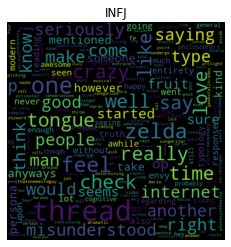

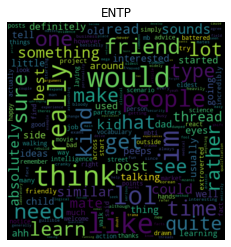

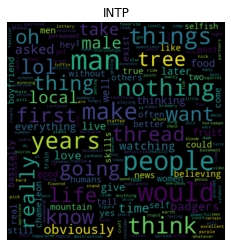

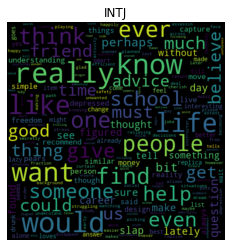

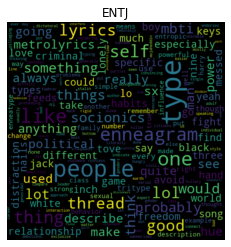

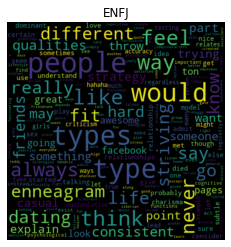

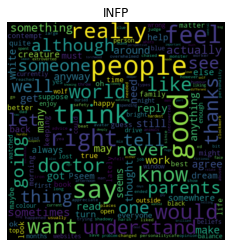

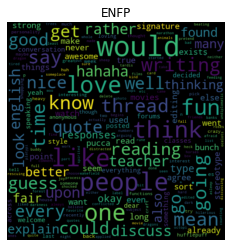

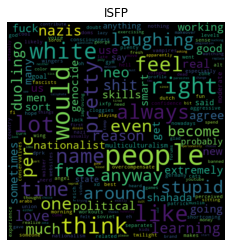

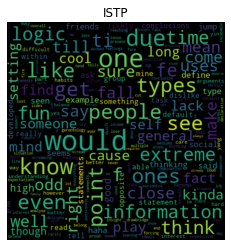

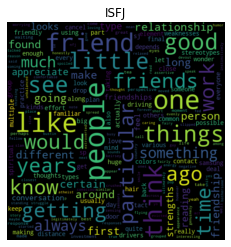

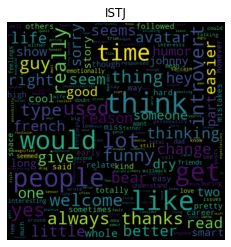

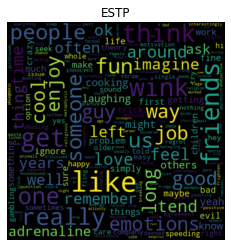

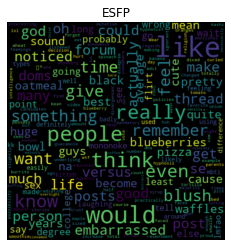

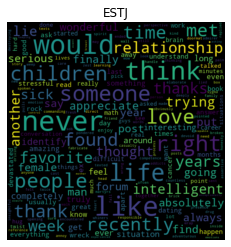

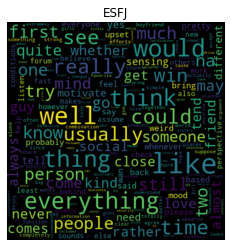

In [94]:
def splitAndCombine(l):
  return reduce(lambda x,y:x+y,[x.split() for x in l])

def countFrequency(l):
  freq = {}
  for word in l:
    if (word in freq):
      freq[word] += 1
    else:
      freq[word] = 1

  return freq

typeWithPostsDict = {k:v for k,v in zip(df_processed['type'], df_processed['posts_without_stopwords_tokenized'])}

typeWithWordsDict = {t:splitAndCombine(pL) for t,pL in typeWithPostsDict.items()}

typeWithWordFrequencyDict = {t:countFrequency(wL) for t,wL in typeWithWordsDict.items()}

typeWithWordClouds = {t:wc.WordCloud(width=500, height=500, max_font_size=64).fit_words(wF) for t,wF in typeWithWordFrequencyDict.items()}

for t,wC in typeWithWordClouds.items():
  plt.figure()
  plt.title(t)
  plt.imshow(wC, interpolation='bilinear')
  plt.axis("off")
  plt.show

**Da die Anzahl an Posts unterschiedlich sind müssen wir mit Durchnschnitten rechnen, daher müssen die ? und ! noch als durchschnitt berechnet werden**

In [97]:
df_processed['avg_exclamations_in_posts'] = np.divide(df_processed['exclamations_in_posts'],df_processed['post_amount'])
df_processed['avg_questions_in_posts'] = np.divide(df_processed['questions_in_posts'],df_processed['post_amount'])
df_processed.head()


,type,exclamations_in_posts,questions_in_posts,posts,links_in_posts,avg_link_per_post,post_amount,words_per_post,avg_words_of_posts,characters_per_post,avg_characters_of_posts,I-E,N-S,T-F,J-P,posts_as_one_list,posts_tokenized,posts_without_stopwords_tokenized,avg_exclamations_in_posts,avg_questions_in_posts
0,INFJ,3,2,[ and moments sportscenter not top ten plays p...,24,0.48,36,"[8, 11, 6, 6, 18, 37, 0, 3, 3, 34, 34, 38, 19,...",16.166667,"[42, 50, 22, 30, 83, 152, 0, 15, 12, 160, 159,...",70.027778,0,0,1,0,and moments sportscenter not top ten plays pr...,"[and, moments, sportscenter, not, top, ten, pl...","[moments, sportscenter, top, ten, plays, prank...",0.083333,0.055556
1,ENTP,0,4,[i am finding the lack of me in these posts ve...,10,0.20,47,"[12, 36, 6, 33, 8, 37, 39, 34, 7, 1, 44, 40, 3...",26.212766,"[45, 158, 28, 150, 39, 145, 149, 149, 27, 4, 1...",101.382979,1,0,0,1,i am finding the lack of me in these posts ver...,"[i, am, finding, the, lack, of, me, in, these,...","[finding, lack, posts, alarming, sex, boring, ...",0.000000,0.085106
2,INTP,4,9,"[good one , of course to which i say i know th...",5,0.10,42,"[2, 15, 38, 9, 38, 36, 8, 10, 11, 24, 23, 10, ...",20.928571,"[7, 50, 152, 25, 156, 155, 27, 46, 64, 100, 11...",88.761905,0,0,0,1,good one of course to which i say i know that...,"[good, one, of, course, to, which, i, say, i, ...","[good, one, course, say, know, blessing, curse...",0.095238,0.214286
3,INTJ,3,9,[dear i enjoyed our conversation the other day...,2,0.04,50,"[29, 8, 17, 13, 10, 35, 35, 35, 18, 8, 38, 1, ...",22.660000,"[147, 34, 65, 79, 36, 154, 165, 149, 92, 27, 1...",92.620000,0,0,0,0,dear i enjoyed our conversation the other day ...,"[dear, i, enjoyed, our, conversation, the, oth...","[dear, enjoyed, conversation, day, esoteric, g...",0.060000,0.180000
4,ENTJ,1,8,"[you are fired , that is another silly misconc...",6,0.12,46,"[3, 33, 33, 7, 36, 11, 8, 37, 12, 15, 3, 40, 4...",22.500000,"[11, 152, 132, 34, 148, 47, 44, 161, 54, 74, 9...",94.717391,1,0,0,0,you are fired that is another silly misconcep...,"[you, are, fired, that, is, another, silly, mi...","[fired, another, silly, misconception, approac...",0.021739,0.173913


In [140]:
value_list = [1]
df_processed['I_E'] = df_processed['I-E']
df_processed['N_S'] = df_processed['N-S']
df_processed['T_F'] = df_processed['T-F']
df_processed['J_P'] = df_processed['J-P']
#df_processed[df_processed.I_E.isin(value_list)]
df_IE = df_processed.groupby('I_E')['links_in_posts', 'exclamations_in_posts', 'questions_in_posts', 'avg_words_of_posts', 'post_amount'].agg('sum')
df_NS = df_processed.groupby('N_S')['links_in_posts', 'exclamations_in_posts', 'questions_in_posts', 'avg_words_of_posts', 'post_amount'].agg('sum')
df_TF = df_processed.groupby('T_F')['links_in_posts', 'exclamations_in_posts', 'questions_in_posts', 'avg_words_of_posts', 'post_amount'].agg('sum')
df_JP = df_processed.groupby('J_P')['links_in_posts', 'exclamations_in_posts', 'questions_in_posts', 'avg_words_of_posts', 'post_amount'].agg('sum')

df_IE['links_in_posts'] = np.divide(df_IE['links_in_posts'],df_IE['post_amount'])
df_IE['exclamations_in_posts'] = np.divide(df_IE['exclamations_in_posts'],df_IE['post_amount'])
df_IE['questions_in_posts'] = np.divide(df_IE['questions_in_posts'],df_IE['post_amount'])
df_IE['avg_words_of_posts'] = np.divide(df_IE['avg_words_of_posts'],df_IE['post_amount'])

df_NS['links_in_posts'] = np.divide(df_NS['links_in_posts'],df_NS['post_amount'])
df_NS['exclamations_in_posts'] = np.divide(df_NS['exclamations_in_posts'],df_NS['post_amount'])
df_NS['questions_in_posts'] = np.divide(df_NS['questions_in_posts'],df_NS['post_amount'])
df_NS['avg_words_of_posts'] = np.divide(df_NS['avg_words_of_posts'],df_NS['post_amount'])

df_TF['links_in_posts'] = np.divide(df_TF['links_in_posts'],df_TF['post_amount'])
df_TF['exclamations_in_posts'] = np.divide(df_TF['exclamations_in_posts'],df_TF['post_amount'])
df_TF['questions_in_posts'] = np.divide(df_TF['questions_in_posts'],df_TF['post_amount'])
df_TF['avg_words_of_posts'] = np.divide(df_TF['avg_words_of_posts'],df_TF['post_amount'])

df_JP['links_in_posts'] = np.divide(df_JP['links_in_posts'],df_JP['post_amount'])
df_JP['exclamations_in_posts'] = np.divide(df_JP['exclamations_in_posts'],df_JP['post_amount'])
df_JP['questions_in_posts'] = np.divide(df_JP['questions_in_posts'],df_JP['post_amount'])
df_JP['avg_words_of_posts'] = np.divide(df_JP['avg_words_of_posts'],df_JP['post_amount'])
df_IE

<ipython-input-140-825c9d4c26bc>:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_IE = df_processed.groupby('I_E')['links_in_posts', 'exclamations_in_posts', 'questions_in_posts', 'avg_words_of_posts', 'post_amount'].agg('sum')
<ipython-input-140-825c9d4c26bc>:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_NS = df_processed.groupby('N_S')['links_in_posts', 'exclamations_in_posts', 'questions_in_posts', 'avg_words_of_posts', 'post_amount'].agg('sum')
<ipython-input-140-825c9d4c26bc>:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_TF = df_processed.groupby('T_F')['links_in_posts', 'exclamations_in_posts', 'questions_in_posts', 'avg_words_of_posts', 'post_amount'].agg('sum')
<ipython-input-140-825c9d4c26bc>:10: FutureWarning: Indexing wit

,links_in_posts,exclamations_in_posts,questions_in_posts,avg_words_of_posts,post_amount
I_E,,,,,
0,0.074957,0.160022,0.177173,0.576357,315020
1,0.053013,0.239949,0.207504,0.565538,95391


In [141]:
df_NS

,links_in_posts,exclamations_in_posts,questions_in_posts,avg_words_of_posts,post_amount
N_S,,,,,
0,0.068630,0.179258,0.184398,0.575982,354278
1,0.077601,0.174443,0.183119,0.560339,56133


In [142]:
df_TF

,links_in_posts,exclamations_in_posts,questions_in_posts,avg_words_of_posts,post_amount
T_F,,,,,
0,0.067738,0.123831,0.194675,0.562871,187990
1,0.071648,0.224889,0.175388,0.583115,222421


In [143]:
df_JP

,links_in_posts,exclamations_in_posts,questions_in_posts,avg_words_of_posts,post_amount
J_P,,,,,
0,0.066545,0.171090,0.185245,0.580674,162417
1,0.072026,0.183517,0.183553,0.569368,247994


Text(0, 0.5, 'Average Question Marks')

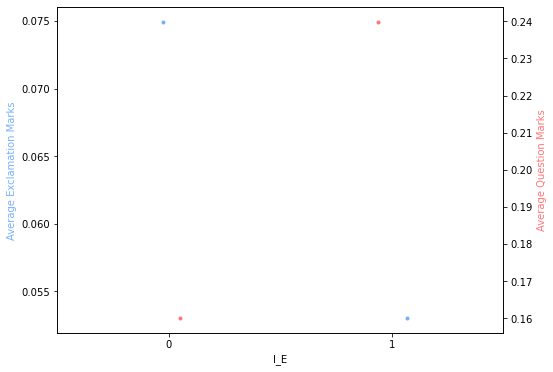

In [155]:
fig, ax1 = plt.subplots(figsize=(8,6))
sns.stripplot(x=df_IE.index, y = 'links_in_posts', s = 4, color="#77b0ff", data = df_IE, ax=ax1)
ax1.set_ylabel('Average Exclamation Marks', color="#77b0ff")
ax2 = ax1.twinx()
sns.stripplot(x=df_IE.index, y = 'exclamations_in_posts', s = 4, color="#ff7777", data = df_IE, ax=ax2)
ax2.set_ylabel('Average Question Marks', color="#ff7777")

Text(0, 0.5, 'Average Question Marks')

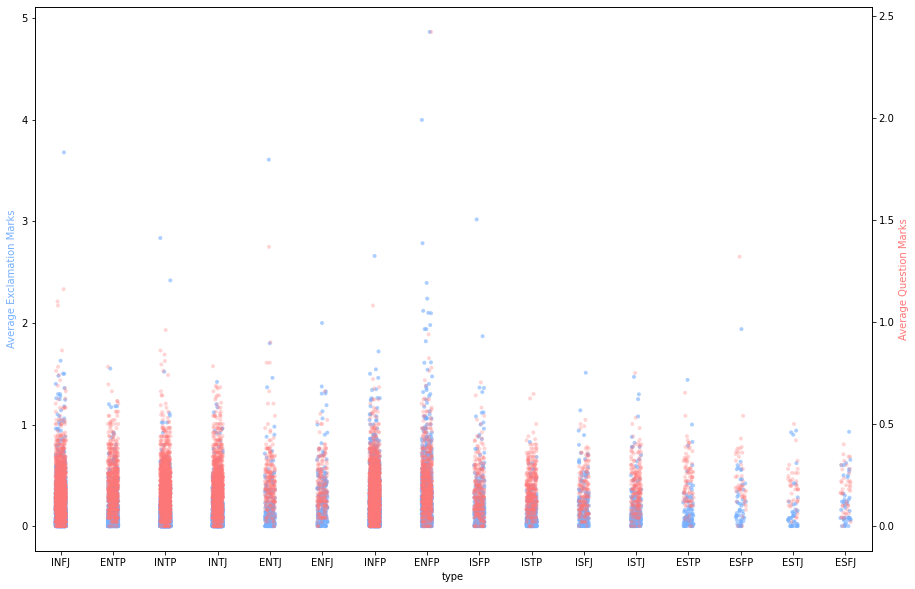

In [144]:
# Durchschnitt von Exclamation und Question Marks visualisieren
fig, ax1 = plt.subplots(figsize=(15,10))
sns.stripplot(x='type', y = 'avg_exclamations_in_posts', s = 4, color="#77b0ff", alpha=0.6, data = df_processed, ax=ax1)
ax1.set_ylabel('Average Exclamation Marks', color="#77b0ff")
ax2 = ax1.twinx()
sns.stripplot(x='type', y = 'avg_questions_in_posts', s = 4, color="#ff7777", alpha=0.3, data = df, ax=ax2)
ax2.set_ylabel('Average Question Marks', color="#ff7777")

Hier der Dataframe mit den ganzen Features, welche wir für die verschiedene ML ansätze benutzen können (**Ggf. ergänzen**)

**TODO**: Die Daten Normalisieren, um diese mit den ML ansätzen zu verweden.

Text(0, 0.5, 'Average Question Marks')

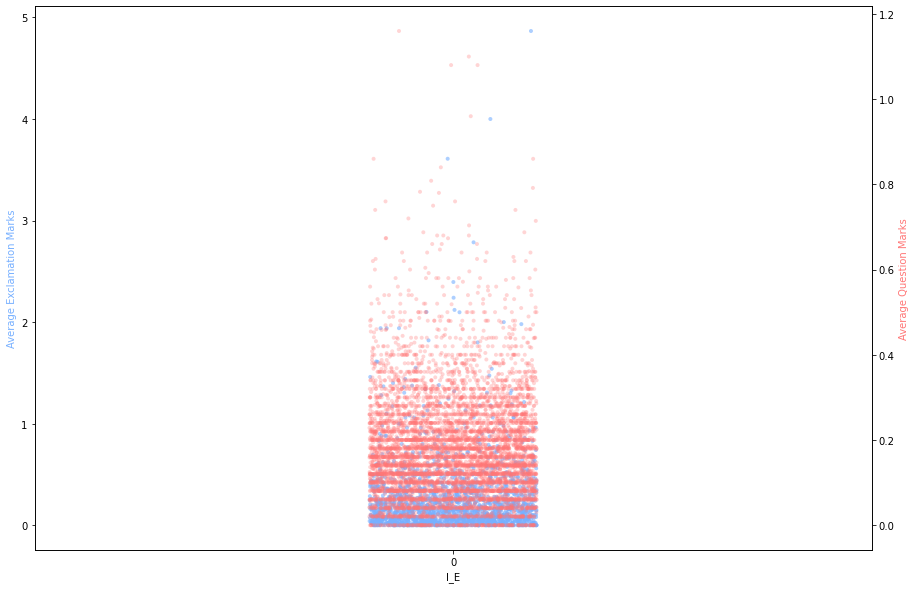

In [145]:
# Durchschnitt von Exclamation pro Ausprägung
fig, ax1 = plt.subplots(figsize=(15,10))
sns.stripplot(x='I_E', y = 'avg_exclamations_in_posts', s = 4, color="#77b0ff", alpha=0.6, data = df_processed[df_processed.I_E.isin(value_list)], ax=ax1)
ax1.set_ylabel('Average Exclamation Marks', color="#77b0ff")
ax2 = ax1.twinx()
sns.stripplot(x='I_E', y = 'avg_questions_in_posts', s = 4, color="#ff7777", alpha=0.3, data = df_processed[~df_processed.I_E.isin(value_list)], ax=ax2)
ax2.set_ylabel('Average Question Marks', color="#ff7777")

In [146]:
#Neuen Dataframe erstellen, mit dem Weitergearbeitet werden kann
selected_columns_2 = df_processed[['type','I-E','N-S','T-F','J-P','posts_without_stopwords_tokenized','avg_exclamations_in_posts', 'avg_questions_in_posts','avg_words_of_posts','avg_link_per_post']]
df_final = selected_columns_2.copy()
df_final.head()


,type,I-E,N-S,T-F,J-P,posts_without_stopwords_tokenized,avg_exclamations_in_posts,avg_questions_in_posts,avg_words_of_posts,avg_link_per_post
0,INFJ,0,0,1,0,"[moments, sportscenter, top, ten, plays, prank...",0.083333,0.055556,16.166667,0.48
1,ENTP,1,0,0,1,"[finding, lack, posts, alarming, sex, boring, ...",0.000000,0.085106,26.212766,0.20
2,INTP,0,0,0,1,"[good, one, course, say, know, blessing, curse...",0.095238,0.214286,20.928571,0.10
3,INTJ,0,0,0,0,"[dear, enjoyed, conversation, day, esoteric, g...",0.060000,0.180000,22.660000,0.04
4,ENTJ,1,0,0,0,"[fired, another, silly, misconception, approac...",0.021739,0.173913,22.500000,0.12


In [147]:
import tensorflow
from keras.preprocessing.text import Tokenizer
num_words = 10000
oov_token = '-NA-'
tokenizer = Tokenizer(num_words=num_words, oov_token=oov_token)
tokenizer.fit_on_texts(df_final['posts_without_stopwords_tokenized'])
df_final['tokens_keras'] = tokenizer.texts_to_sequences(df_final['posts_without_stopwords_tokenized'])

# summarize what was learned
#print(tokenizer.word_counts)  #A dictionary of words and their counts.
#print(tokenizer.document_count) #An integer count of the total number of documents that were used to fit the Tokenizer.
print('Zuordnung')
print(tokenizer.word_index) #A dictionary of words and their uniquely assigned integers.
#print(tokenizer.word_docs) # A dictionary of words and how many documents each appeared in.
df_final.head()

ModuleNotFoundError: No module named 'tensorflow'

# Daten müssen noch normalisiert werden -> WIE?
so villeicht?: https://www.kdnuggets.com/2020/03/tensorflow-keras-tokenization-text-data-prep.html


Hier kommt der Split der Daten und anschließend das Training, aber vorher müssen diese noch normalisiert werden und richtig encoded

In [ ]:
from sklearn.model_selection import train_test_split

def one_hot_encode_sequence(seq, dim):
    result = np.zeros((len(seq), dim)) #create a all-zero matrix of shape [seq, dim]
    for row, col in enumerate(seq):
        result[row, col] = 1
    return result

# input (X) and output (y) columns
x_raw = df_final.drop(['type'], axis=1).values
y_raw = df_final['type'].values

data = np.array([x[9] for x in x_raw])
labels = np.array([list(x) for x in y_raw])

print(len(data))
print(len(labels))

print(labels)

from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(labels)

for (i, label) in enumerate(mlb.classes_):
	print("{}. {}".format(i + 1, label))

(train_data, test_data, train_labels, test_labels) = train_test_split(data, labels, test_size=0.2, random_state=42)

print("Train Data with {} samples. Example: {} has {} words".format(len(train_data), train_data[0], len(train_data[0])))
print("Train Data {} samples.  Label Example: {}".format(len(train_labels),train_labels[0]))
print("Test Data has {} samples".format(test_data.shape[0]))

x_train = one_hot_encode_sequence(train_data, num_words)
x_test = one_hot_encode_sequence(test_data, num_words)

print(x_train[1,:100])
print("x_train is a matrix of {}x{}".format(x_train.shape[0],x_train.shape[1]))
print("x_test is a matrix of {}x{}".format(x_test.shape[0],x_test.shape[1]))

In [ ]:
#put some - e.g. 20% - train samples as cross validation (dev) set aside
x_train_samples, x_val_samples, y_train_samples, y_val_samples = train_test_split(x_train, train_labels, train_size=0.80)

print("x_train_samples is a matrix of {}x{}".format(x_train_samples.shape[0],x_train_samples.shape[1]))
print("y_train_samples is an array of length:{}".format(y_train_samples.shape[0]))
print("x_val_samples is a matrix of {}x{}".format(x_val_samples.shape[0],x_val_samples.shape[1]))
print("y_val_samples is an array of length:{}".format(y_val_samples.shape[0]))

In [ ]:
from keras import models
from keras import utils
from keras import layers
from keras import losses
from keras import optimizers

#hyperparameter

hiddenlayer_neurons=64
hiddenlayer_activation_function='relu'

model = models.Sequential()

#1st layer - input layer
model.add(layers.Dense(units= hiddenlayer_neurons, activation=hiddenlayer_activation_function, input_shape=(num_words,)))
#2nd layer
model.add(layers.Dense(units= hiddenlayer_neurons, activation=hiddenlayer_activation_function))

#...
model.add(layers.Dense(units= hiddenlayer_neurons, activation=hiddenlayer_activation_function))
model.add(layers.Dense(units= hiddenlayer_neurons, activation=hiddenlayer_activation_function))
model.add(layers.Dense(units= hiddenlayer_neurons, activation=hiddenlayer_activation_function))
model.add(layers.Dense(units= hiddenlayer_neurons, activation=hiddenlayer_activation_function))
model.add(layers.Dense(units= hiddenlayer_neurons, activation=hiddenlayer_activation_function))
model.add(layers.Dense(units= hiddenlayer_neurons, activation=hiddenlayer_activation_function))
model.add(layers.Dense(units= hiddenlayer_neurons, activation=hiddenlayer_activation_function))


#last layer -output layer - has 46 outputs (len of topics array)
model.add(layers.Dense(len(mlb.classes_), activation='sigmoid'))


#An optimizer. The gradient descent algorithm - this could be the string identifier of an existing optimizer
# such as rmsprop or adagrad
# see also: https://keras.io/optimizers/

#loss: The loss function - the objective that the model will try to minimize. 
#It can be the string identifierof an existing loss function (such as categorical_crossentropy or mse)


model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001),
             loss = losses.binary_crossentropy, #.mean_squared_error, #categorical_crossentropy
             metrics=['accuracy'])

In [ ]:
history = model.fit (
                    x_train_samples,
                    y_train_samples,
                    epochs = 30, # how many time to repeat the learning process for the entire dataset
                    batch_size=128, # we will reset the weights batch-size wise (mini batch GD)
                    validation_data = (x_val_samples, y_val_samples)
                    )

In [ ]:
result = model.evaluate(x_test,test_labels) # final evaluation of the model
print("result on the testset: accuracy={}".format(result[1]))

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

history_dict = history.history
#print(history_dict)

amount_epochs = len(history_dict['accuracy']) 
plt.plot(range(1, amount_epochs+1), history_dict['loss'], 'ro', label='Training Set Loss')
plt.plot(range(1, amount_epochs+1), history_dict['val_loss'], 'r', label='Validation Set Loss')

plt.xlabel('Training Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.plot(range(1, amount_epochs+1), history_dict['accuracy'], 'bo', label='Training Set Accuracy')
plt.plot(range(1, amount_epochs+1), history_dict['val_accuracy'], 'b', label='Validation Set Accuracy')

plt.xlabel('Training Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# define new dataset

predictions = model.predict(x_test)
print("predictions is a matrix of {}x{}".format(predictions.shape[0],predictions.shape[1]))

In [ ]:
index = 1734
print("prediction: \n {} \n\n"
      .format(predictions[index]
      ))

print("ground truth label class: {}".format(test_labels[index]))

result = []

im_classlist =  [x for x in predictions[index]]
m_classList = [x for x in predictions[index]]

for i in range(4) :
  print(m_classList)
  maxItem = max(m_classList)
  result.append(im_classlist.index(maxItem))
  m_classList.remove(maxItem)

print("found indices: " + str(result))

print("class in binarizer: " + str(mlb.classes_))

# I E S N F T J P
letters = [0, 2, 6, 4, 1, 7, 3, 5]

result.sort(key = lambda i: letters.index(i))

print("MBTI: {}".format([mlb.classes_[x] for x in result]))